In [1]:
import pandas as pd 
import numpy as np

In [3]:
#Load DataA.csv 

dataA = pd.read_csv(r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\ece_657a_assignments-master\ece_657a_assignments-master\Assignment_1\Datasets\DataA.csv')

In [4]:
print("dataA: \n", dataA)

dataA: 
        Unnamed: 0  fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7  fea.8  \
0               1 -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0  948.0   
1               2 -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0  939.0   
2               3 -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0  936.0   
3               4 -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0  918.0   
4               5 -171.0    NaN  929.0 -189.0  1004.0  104.0 -198.0  939.0   
...           ...    ...    ...    ...    ...     ...    ...    ...    ...   
18995       18996    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18996       18997    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18997       18998    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18998       18999    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   
18999       19000    NaN    NaN    NaN    NaN     NaN    NaN    NaN    NaN   

       fea.9  ...  fea.72  fea.73  fea.74  fea.75  fea

In [7]:
dataA.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


## Shape of the Dataset

In [8]:
dataA.shape

(19000, 82)

#### The Dataset has 19000 samples and 82 features. However there is a Unamed column 'Unnamed' which is just the count which needs to be removed from the dataset 

## Checking all Columns

In [10]:
dataA.columns

Index(['Unnamed: 0', 'fea.1', 'fea.2', 'fea.3', 'fea.4', 'fea.5', 'fea.6',
       'fea.7', 'fea.8', 'fea.9', 'fea.10', 'fea.11', 'fea.12', 'fea.13',
       'fea.14', 'fea.15', 'fea.16', 'fea.17', 'fea.18', 'fea.19', 'fea.20',
       'fea.21', 'fea.22', 'fea.23', 'fea.24', 'fea.25', 'fea.26', 'fea.27',
       'fea.28', 'fea.29', 'fea.30', 'fea.31', 'fea.32', 'fea.33', 'fea.34',
       'fea.35', 'fea.36', 'fea.37', 'fea.38', 'fea.39', 'fea.40', 'fea.41',
       'fea.42', 'fea.43', 'fea.44', 'fea.45', 'fea.46', 'fea.47', 'fea.48',
       'fea.49', 'fea.50', 'fea.51', 'fea.52', 'fea.53', 'fea.54', 'fea.55',
       'fea.56', 'fea.57', 'fea.58', 'fea.59', 'fea.60', 'fea.61', 'fea.62',
       'fea.63', 'fea.64', 'fea.65', 'fea.66', 'fea.67', 'fea.68', 'fea.69',
       'fea.70', 'fea.71', 'fea.72', 'fea.73', 'fea.74', 'fea.75', 'fea.76',
       'fea.77', 'fea.78', 'fea.79', 'fea.80', 'fea.81'],
      dtype='object')

## Removing 'Unnamed' columns from the dataset

In [11]:
dataA_updated = dataA.drop(['Unnamed: 0'], axis=1)
print("Updated Dataset after removal of 'Unnamed: 0' column: \n", dataA_updated.head(20))

Updated Dataset after removal of 'Unnamed: 0' column: 
     fea.1  fea.2  fea.3  fea.4   fea.5  fea.6  fea.7   fea.8  fea.9  fea.10  \
0  -153.0  414.0  939.0 -161.0  1007.0   99.0 -210.0   948.0  333.0   -19.0   
1  -150.0  420.0  939.0 -177.0  1008.0  103.0 -207.0   939.0  316.0     9.0   
2  -160.0  432.0  941.0 -162.0   982.0   98.0 -198.0   936.0  315.0   -10.0   
3  -171.0  432.0  911.0 -174.0   999.0  115.0 -187.0   918.0  338.0    34.0   
4  -171.0    NaN  929.0 -189.0  1004.0  104.0 -198.0   939.0  350.0    60.0   
5  -171.0  432.0  924.0 -179.0  1011.0   85.0 -204.0   945.0  336.0    94.0   
6  -169.0  429.0  949.0 -175.0  1007.0  102.0 -188.0   914.0  322.0   154.0   
7  -160.0  423.0  927.0 -195.0   996.0  123.0 -213.0   925.0  302.0   128.0   
8  -163.0  432.0  929.0 -178.0   994.0  101.0 -186.0   946.0  296.0   166.0   
9  -156.0  415.0  936.0 -186.0  1014.0  111.0 -195.0   960.0  280.0   202.0   
10 -153.0  413.0  923.0 -187.0   993.0   91.0 -193.0   970.0  282.0   233.0

In [12]:
dataA_updated.shape

(19000, 81)

#### The Column 'Unnamed: 0' has been removed from the dataset as we can see in the above data and now the dimension of the dataset has become (19000, 81) which means it has 19000 samples and 81 features in total

##  Identifying Missing Values in the Dataset

In [14]:
dataA_updated.isnull()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
18996,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
18997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
18998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True



#### Here We can see in the dataset there are many missing value in the Dataset


##  Number of Missing values per columns

In [15]:
# Find the Total number of missing values in each column
dataA_updated.isnull().sum()

fea.1     1187
fea.2     1188
fea.3     1187
fea.4      800
fea.5      800
          ... 
fea.77     773
fea.78     773
fea.79     773
fea.80     773
fea.81     773
Length: 81, dtype: int64

#### As we can see from the above table that the dataset contains too many missing values and each feature has different number of missing values. As from the table it is clear that feature.1 has 1187 missing values, feature.2 has 1188 missing values while from feature.37 to feature.81 all have a missing value of 773 which is the lowest value missing among all the features. Whereas feature.34 to feature.36 have 18999 missing values which highest among all the features in the entire dataset.

#### Total number of Missing values in the dataset


In [17]:
 dataA_updated.isnull().sum().sum()

124053

#### In total there are 124053 missing values in the dataset

The bar graph showing missing values of all the features:

In [18]:
import seaborn as sns #importing seaborn to plot

to see visualizations inside the notebook

In [20]:
%matplotlib inline

In [22]:
dataA_updated.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0


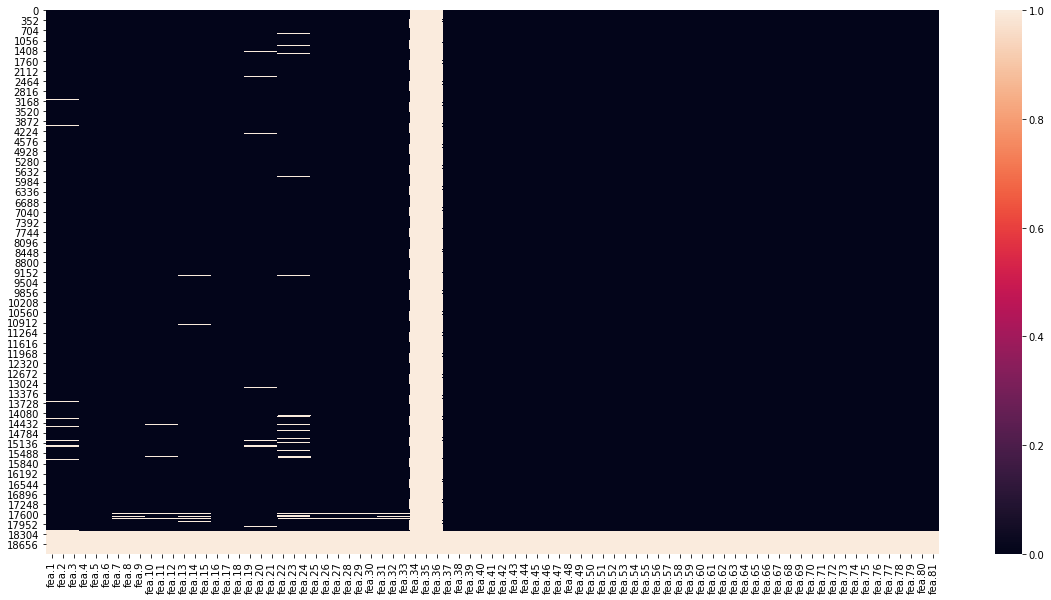

In [28]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
sns.heatmap(dataA_updated.isnull())

Feature 34, 35 and 36 and missing, So have to be removed

## Drop feature.34, feature.35 and feature.36

In [30]:
dataA_updated = dataA_updated.drop(['fea.34', 'fea.35', 'fea.36'], axis=1)

In [31]:
dataA_updated

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



#### Feature.34, Feature.35 and feature.36 has been dropped from the dataset


# Detecting Outliers in DataSet

In [35]:
dataA_std= dataA_updated.std()
dataA_mean=dataA_updated.mean()

dataA_data_outliers=dataA_updated.apply(lambda y: np.abs(y-dataA_mean)>(3*dataA_std),axis=1)
print("Total number of ouliers in each feature are:",dataA_data_outliers.sum())

Total number of ouliers in each feature are: fea.1     364
fea.2     137
fea.3     172
fea.4     136
fea.5     722
         ... 
fea.77     19
fea.78    205
fea.79    330
fea.80    189
fea.81    411
Length: 78, dtype: int64


In [38]:
print("Total number of outliers are:",dataA_data_outliers.sum().sum())

Total number of outliers are: 14622


#### Replace the outliers with NaN so that it can be replaced with missing values

In [41]:
dataA_array=dataA_updated.values
pd.DataFrame(np.where(dataA_data_outliers, np.nan, dataA_array), dataA_updated.index, dataA_updated.columns)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Total number of missing values including converted outliers to missing values(NaN)

In [42]:
print(dataA_updated.isna().sum().sum())

67056


#### The dataset contains missing values in the other Feature sets. So we will apply Imputation of missing values learned during lectures. 

# Imputing Missing Values
### 1. Replace missing data by Mean values for each columns

In [43]:
dataA_updated.fillna(dataA_updated.mean(), inplace=True)

In [46]:
print(dataA_updated.isnull().sum().sum()) #Check for missing values in entire dataset

0


## 3. Normalize data using min-max and z-score normalization. Plot histograms of feature 9 and 24,  compare and comment on the differences before and after normalization